<a href="https://colab.research.google.com/github/Nilswonderland/Portfolio/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
x_train[10].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [17]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

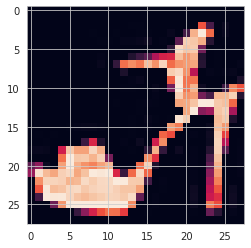

In [18]:
plt.imshow(x_train[9])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


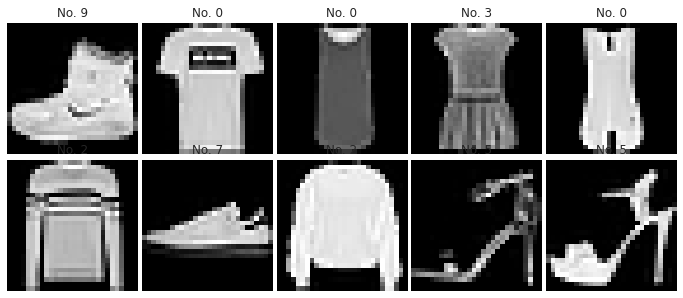

In [19]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[9].min()

0.0

In [23]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [27]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [31]:
y_train[9]

5

In [32]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [38]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3864 - accuracy: 0.8620 - val_loss: 0.3094 - val_accuracy: 0.8866
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2621 - accuracy: 0.9044 - val_loss: 0.2863 - val_accuracy: 0.8925
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2198 - accuracy: 0.9195 - val_loss: 0.2515 - val_accuracy: 0.9072
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1868 - accuracy: 0.9299 - val_loss: 0.2429 - val_accuracy: 0.9135
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1605 - accuracy: 0.9409 - val_loss: 0.2447 - val_accuracy: 0.9150
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1394 - accuracy: 0.9485 - val_loss: 0.2826 - val_accuracy: 0.9072


**TASK 7: Plot values of metrics you used in your model.**

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.386,0.862,0.309,0.887
1,0.262,0.904,0.286,0.892
2,0.220,0.919,0.251,0.907
3,0.187,0.930,0.243,0.914
4,0.160,0.941,0.245,0.915


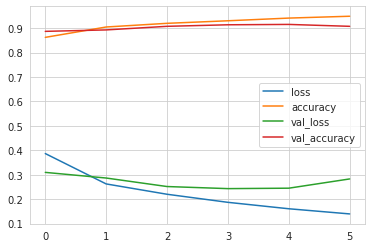

In [41]:
summary.plot();

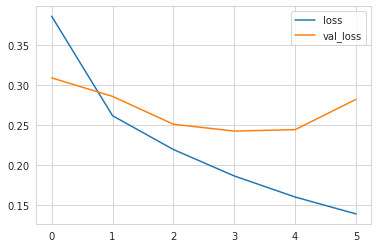

In [42]:
summary[["loss", "val_loss"]].plot();

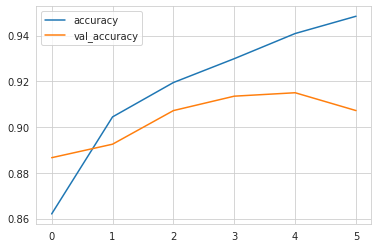

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2429 - accuracy: 0.9135


[0.24291203916072845, 0.9135000109672546]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24291203916072845
Test accuracy: 0.9135000109672546


In [48]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.5582841e-06, 8.7228905e-08, 3.7473846e-08, ..., 3.2826625e-03,
        1.7314358e-06, 9.9668485e-01],
       [8.4205712e-05, 2.1497511e-10, 9.9989235e-01, ..., 7.3783823e-13,
        1.5123865e-09, 3.1863628e-10],
       [2.6224214e-07, 9.9999976e-01, 4.9844173e-09, ..., 1.4621533e-13,
        4.8339848e-09, 2.3890612e-12],
       ...,
       [3.0727645e-07, 6.3467821e-11, 5.8052262e-07, ..., 4.4474189e-09,
        9.9998450e-01, 1.2291115e-10],
       [9.5405639e-09, 9.9999917e-01, 8.3453653e-09, ..., 1.1756347e-13,
        8.3848296e-11, 1.4404859e-10],
       [5.0372654e-04, 2.9129224e-06, 1.3295275e-03, ..., 2.4891762e-01,
        2.1950987e-03, 4.1929185e-03]], dtype=float32)

In [49]:
pred_prob.shape

(10000, 10)

In [50]:
pred_prob[0]

array([1.5582841e-06, 8.7228905e-08, 3.7473846e-08, 1.9635301e-07,
       1.5775935e-07, 2.7929544e-05, 7.1392179e-07, 3.2826625e-03,
       1.7314358e-06, 9.9668485e-01], dtype=float32)

In [51]:
np.argmax(pred_prob[0])

9

In [52]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
y_pred.shape

(10000,)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.83      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.84      0.88      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.71      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [55]:
print(confusion_matrix(y_test, y_pred))

[[901   0  11  17   2   0  62   0   7   0]
 [  0 987   0   8   2   0   2   0   1   0]
 [ 18   1 829   9  76   0  67   0   0   0]
 [ 17   7   4 938  17   1  13   0   3   0]
 [  1   1  36  32 875   1  52   0   2   0]
 [  0   0   0   0   0 969   0  13   0  18]
 [128   0  43  35  70   0 715   0   9   0]
 [  0   0   0   0   0   5   0 976   0  19]
 [  2   1   0   6   1   2   2   2 984   0]
 [  0   0   0   0   0   4   1  34   0 961]]


In [56]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [57]:
(y_test != y_pred).sum()

865

## Prediction

In [65]:
my_number = X_test[5]

In [61]:
my_number.shape

(28, 28, 1)

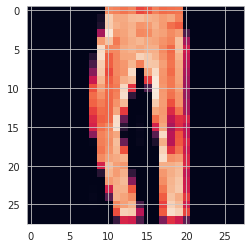

In [66]:
plt.imshow(my_number.reshape(28,28));

In [67]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[3.5823359e-05, 9.9996221e-01, 6.2696512e-07, 2.6530111e-07,
        2.8875702e-08, 6.4802265e-08, 2.5764578e-07, 1.7564485e-11,
        7.6804474e-07, 2.9358200e-11]], dtype=float32)

In [68]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [69]:
model.save("model-1")

INFO:tensorflow:Assets written to: model-1/assets


In [70]:
model=tf.keras.models.load_model('model-1')

In [71]:
pred=model.predict(np.expand_dims(X_test[5],axis=0))

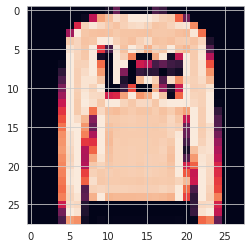

In [74]:
plt.imshow(X_test[1].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___